# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1721430469212.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,07/18/2024,5544.59,5608.56,5614.05,5522.81
1,07/17/2024,5588.27,5610.07,5622.49,5584.81
2,07/16/2024,5667.20,5644.09,5669.67,5639.02
3,07/15/2024,5631.22,5638.16,5666.94,5614.75
4,07/12/2024,5615.35,5590.76,5655.56,5590.44
...,...,...,...,...,...
2523,07/25/2014,1978.34,1984.60,1984.60,1974.37
2524,07/24/2014,1987.98,1988.07,1991.39,1985.79
2525,07/23/2014,1987.01,1985.32,1989.23,1982.44
2526,07/22/2014,1983.53,1975.65,1986.24,1975.65


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2528.000000,2528.000000,2528.000000,2528.000000
mean,3179.497184,3169.160277,3186.083006,3151.037025
std,984.480432,1005.093234,1010.709616,999.571245
min,1829.080000,0.000000,0.000000,0.000000
25%,2267.217500,2268.105000,2272.110000,2260.047500
50%,2889.295000,2896.905000,2906.540000,2880.200000
75%,4090.860000,4087.187500,4120.525000,4068.650000
max,5667.200000,5644.090000,5669.670000,5639.020000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,3184.854773,3184.275509,3201.278951,3166.065819
std,983.750117,983.301738,988.808499,977.910469
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2271.617500,2270.990000,2277.387500,2265.240000
50%,2896.730000,2901.155000,2909.620000,2884.910000
75%,4098.027500,4091.087500,4126.737500,4071.672500
max,5667.200000,5644.090000,5669.670000,5639.020000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2527
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

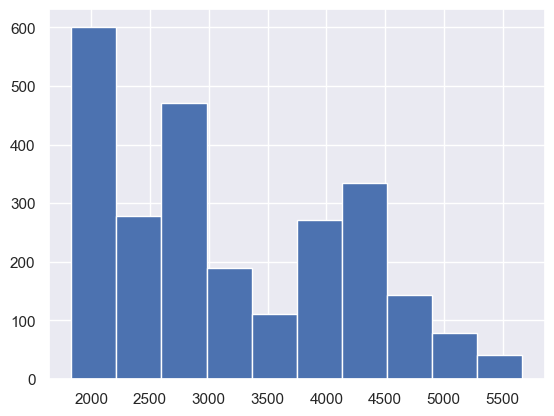

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5544.59

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3184.8547734499252

In [10]:
close_sd = df['Close/Last'].std()
close_sd

983.7501173233294

In [11]:
sigma1 = close_mean + close_sd
sigma1

4168.604890773255

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

5152.355008096584

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5644.2300667582485

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2527
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-07-21 to 2024-07-18')

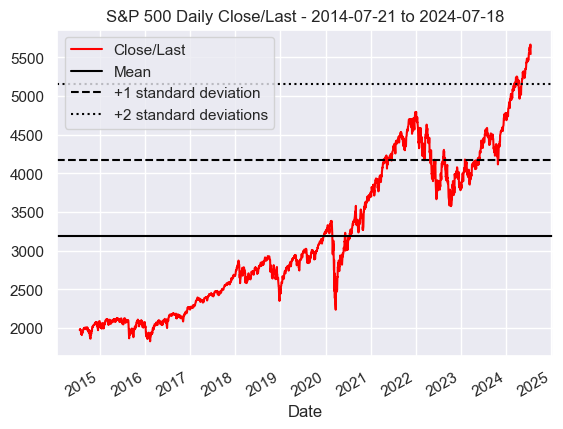

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-07-21 to 2024-07-18')

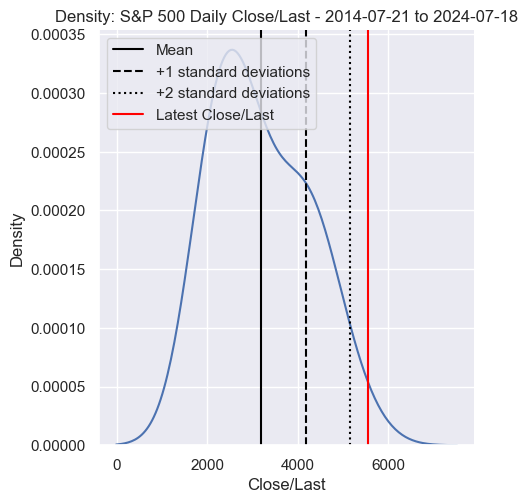

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.398714048411646

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results